In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly
import plotly.graph_objects as go
data = pd.read_csv(r"C:\Users\Shhhriyr\Desktop\GBPJPY_Outlook.csv")#ba r'string' shoma mitonid path csv data haton ro vared konid.
print(data) #csv ro inja namayesh mide
df = pd.read_csv(r"C:\Users\Shhhriyr\Desktop\GBPJPY_Outlook.csv")

      Unnamed: 0       Date     Open     High      Low    Close  ShortLots  \
0              0  4/18/2019  146.025  146.136  145.287  145.375       0.00   
1              1  4/19/2019  145.373  145.574  145.291  145.401    2871.87   
2              2  4/20/2019  145.410  145.510  145.215  145.285    2866.82   
3              3  4/21/2019  145.290  145.625  144.583  144.713    2833.32   
4              4  4/22/2019  144.707  145.018  144.401  144.716    2427.07   
...          ...        ...      ...      ...      ...      ...        ...   
996          996   1/8/2022  160.599  161.642  160.490  161.512     936.83   
997          997   1/9/2022  161.429  161.718  161.163  161.641     876.96   
998          998  1/10/2022  161.552  163.751  161.432  163.526     921.22   
999          999  1/11/2022  163.482  163.565  162.387  162.509    1591.01   
1000        1000  1/12/2022  162.232  162.745  162.054  162.388    1120.67   

      LongLots  ShortPosition  LongPosition  
0         0.00   

In [2]:
Open = np.array(data['Open'])
High = np.array(data['High'])
Low = np.array(data['Low'])                   #in 9 moteghayer csv be list tabdil mishe
Close = np.array(data['Close'])
ShortLots = np.array(data['ShortLots'])
LongLots = np.array(data['LongLots'])
ShortPosition = np.array(data['ShortPosition'])
LongPosition = np.array(data['LongPosition'])
Date = np.array(data['Date'])

In [3]:
close1 = []
open1 = []
high1 = []
low1 = []
for i in range(len(Open)):
    closei = (Open[i]+High[i]+Low[i]+Close[i])/4
    close1.append(closei)
    openi = (Open[i-1]+Close[i-1])/2
    open1.append(openi)
    open1[0] = Open[0] #in bekhater ine ke age barabar ba array0 open gharar nadim ba n-1 i ke mikonad mire akhare jadval
    highi = max(Open[i],High[i],Close[i])
    high1.append(highi)
    lowi = min(Open[i],Low[i],Close[i])
    low1.append(lowi)

In [4]:
#for i in range(0,len(close1)):
#    print(open1[i],high1[i],low1[i],close1[i],'\n')

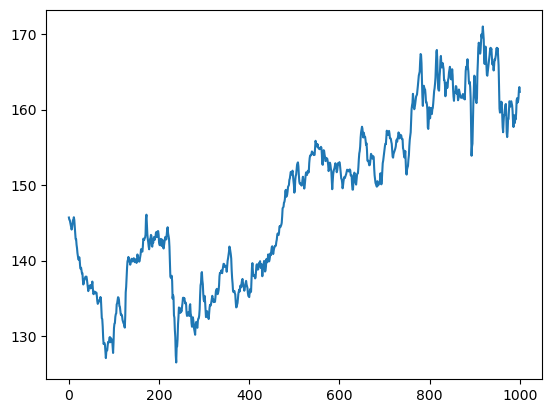

In [5]:
plt.plot(close1)

In [6]:
#charte_Heiken_Ashi
#from datetime import datetime
#fig = go.Figure(data=[go.Candlestick(x=data['Date'],
#                open=open1,
#                high=high1,
#                low=low1,
#                close=close1)])

#fig.show()

In [7]:
#data["EMA20"] = ta.ema(data['Close'], length=20)
#data["EMA50"] = ta.ema(data['Close'], length=50)
#data['RSI'] = ta.rsi(data['Close'], length=12)

In [8]:
#bict = {'Date':Date,'open': Open, 'high': High,
#        'low': Low, 'close': Close,
#        'Heiken_Open' : open1,'Heiken_Close' : close1,
#       'Heiken_High': high1, 'Heiken_Low': low1,'EMA20':data["EMA20"],'EMA50':data["EMA50"],'RSI':data["RSI"]}
#df = pd.DataFrame(bict) 
#df.to_csv('USDJPY.csv')"""

In [9]:
longlotsbeposlong = np.zeros(len(data['Close']))
shortlotsbeposshort = []
poslongbeposshort = []
longlotsbeshortlots = []
longlots1 = []
longposition1 = []
shortlots1 = []
shortposition1 = []
for i in range(len(LongLots)):
    longlotsbeposlong[i] = (LongLots[i])/(LongPosition[i])
    shortlotsbeposshort.append((ShortLots[i])/(ShortPosition[i]))
    longlots1.append(LongLots)
    longposition1.append(LongPosition)
    shortlots1.append(ShortLots)
    shortposition1.append(ShortPosition)
    poslongbeposshort.append((LongPosition[i])/(ShortPosition[i]))
    longlotsbeshortlots.append((LongLots[i])/(ShortLots[i]))

C:\Users\Shhhriyr\AppData\Local\Temp\ipykernel_9704\3286000395.py:10: RuntimeWarning: invalid value encountered in double_scalars
  longlotsbeposlong[i] = (LongLots[i])/(LongPosition[i])
C:\Users\Shhhriyr\AppData\Local\Temp\ipykernel_9704\3286000395.py:11: RuntimeWarning: invalid value encountered in double_scalars
  shortlotsbeposshort.append((ShortLots[i])/(ShortPosition[i]))
C:\Users\Shhhriyr\AppData\Local\Temp\ipykernel_9704\3286000395.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  poslongbeposshort.append((LongPosition[i])/(ShortPosition[i]))
C:\Users\Shhhriyr\AppData\Local\Temp\ipykernel_9704\3286000395.py:17: RuntimeWarning: invalid value encountered in double_scalars
  longlotsbeshortlots.append((LongLots[i])/(ShortLots[i]))


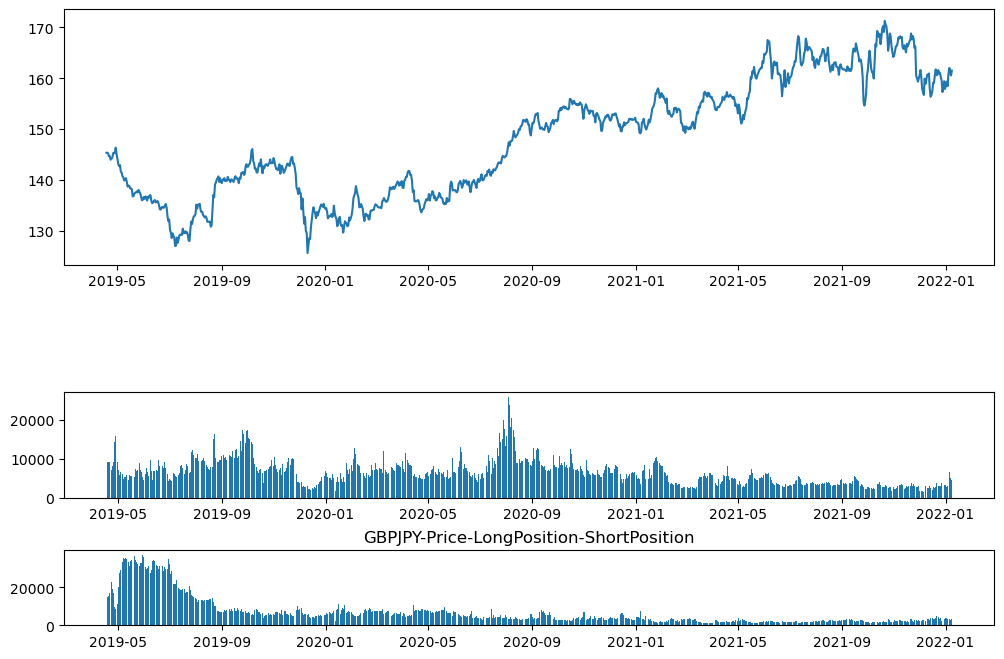

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
start_date = pd.to_datetime('2019-4-15')
end_date = pd.to_datetime('2022-1-8')                         
df['Date'] = pd.to_datetime(df['Date']) 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((7,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data["Close"])
middle_plt = plt.subplot2grid((7,4), (6,0), rowspan=1, colspan=4)
middle_plt.bar(stock_data.index, stock_data['LongPosition'])
plt.title('GBPJPY-Price-LongPosition-ShortPosition')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['ShortPosition'])
plt.gcf().set_size_inches(12,8)

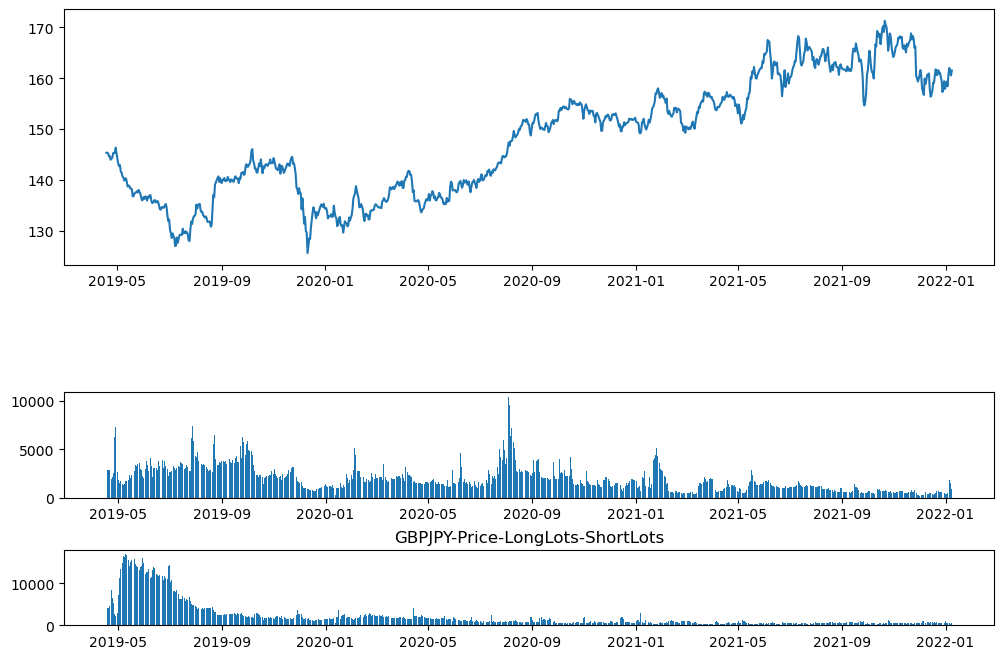

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
start_date = pd.to_datetime('2019-4-15')
end_date = pd.to_datetime('2022-1-8')                         
df['Date'] = pd.to_datetime(df['Date']) 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((7,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data["Close"])
middle_plt = plt.subplot2grid((7,4), (6,0), rowspan=1, colspan=4)
middle_plt.bar(stock_data.index, stock_data['LongLots'])
plt.title('GBPJPY-Price-LongLots-ShortLots')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['ShortLots'])
plt.gcf().set_size_inches(12,8)

In [12]:
np.shape(stock_data["Close"])
longlotsbeposlong = []
shortlotsbeposshort = []
poslongbeposshort = []
longlotsbeshortlots = []
longlots1 = []
longposition1 = []
shortlots1 = []
shortposition1 = []
for i in range(len(stock_data["Close"])):
    longlotsbeposlong.append((LongLots[i])/(LongPosition[i]))
    shortlotsbeposshort.append((ShortLots[i])/(ShortPosition[i]))
    longlots1.append(LongLots)
    longposition1.append(LongPosition)
    shortlots1.append(ShortLots)
    shortposition1.append(ShortPosition)
    poslongbeposshort.append((LongPosition[i])/(ShortPosition[i]))
    longlotsbeshortlots.append((LongLots[i])/(ShortLots[i]))

C:\Users\Shhhriyr\AppData\Local\Temp\ipykernel_9704\620883944.py:11: RuntimeWarning: invalid value encountered in double_scalars
  longlotsbeposlong.append((LongLots[i])/(LongPosition[i]))
C:\Users\Shhhriyr\AppData\Local\Temp\ipykernel_9704\620883944.py:12: RuntimeWarning: invalid value encountered in double_scalars
  shortlotsbeposshort.append((ShortLots[i])/(ShortPosition[i]))
C:\Users\Shhhriyr\AppData\Local\Temp\ipykernel_9704\620883944.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  poslongbeposshort.append((LongPosition[i])/(ShortPosition[i]))
C:\Users\Shhhriyr\AppData\Local\Temp\ipykernel_9704\620883944.py:18: RuntimeWarning: invalid value encountered in double_scalars
  longlotsbeshortlots.append((LongLots[i])/(ShortLots[i]))


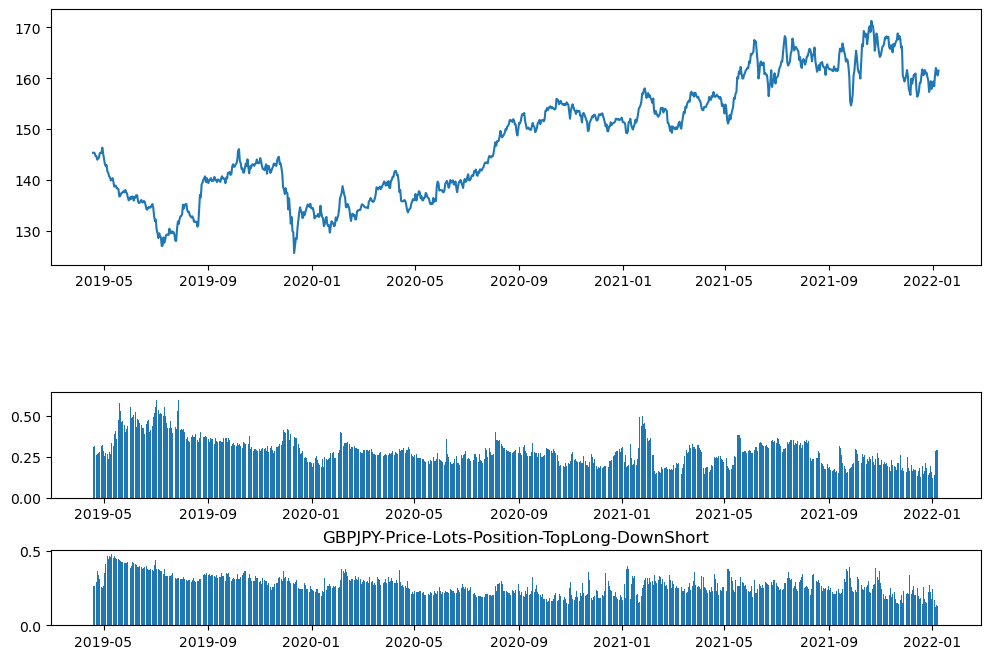

In [13]:
start_date = pd.to_datetime('2019-4-15')
end_date = pd.to_datetime('2022-1-8')                         
df['Date'] = pd.to_datetime(df['Date']) 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((7,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data["Close"])
middle_plt = plt.subplot2grid((7,4), (6,0), rowspan=1, colspan=4)
middle_plt.bar(stock_data.index, longlotsbeposlong)
plt.title('GBPJPY-Price-Lots-Position-TopLong-DownShort')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, shortlotsbeposshort)
plt.gcf().set_size_inches(12,8)

In [14]:
fig=go.Figure()
fig = plotly.subplots.make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.01, row_heights=[0.5,0.5,0.5],subplot_titles=("MarketData", "LongPosition", "ShortPosition"),)
fig.add_trace(go.Candlestick(x=df['Date'], open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'], name='market data'))
fig.add_trace(go.Bar(x=df['Date'], y=df['LongPosition']), row=2, col=1)
fig.add_trace(go.Bar(x=df['Date'], y=df['ShortPosition']), row=3, col=1)
fig.update_layout(height=900, width=1200, showlegend=True, xaxis_rangeslider_visible=False,title_text="GBPJPY-LongPosition-ShortPosition")

In [15]:
fig=go.Figure()
fig = plotly.subplots.make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.01, row_heights=[0.5,0.5,0.5],subplot_titles=("MarketData", "LongLots", "ShortLots"),)
fig.add_trace(go.Candlestick(x=df['Date'], open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'], name='market data'))
fig.add_trace(go.Bar(x=df['Date'], y=df['LongLots']), row=2, col=1)
fig.add_trace(go.Bar(x=df['Date'], y=df['ShortLots']), row=3, col=1)
fig.update_layout(height=900, width=1200, showlegend=True, xaxis_rangeslider_visible=False,title_text="GBPJPY-LongLots-ShortLots")

In [16]:
df22 = pd.DataFrame()
df22['longlotsbeposlong'] = longlotsbeposlong
df22['shortlotsbeposshort'] = shortlotsbeposshort

In [17]:
fig=go.Figure()
fig = plotly.subplots.make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.01, row_heights=[0.5,0.5,0.5],subplot_titles=("MarketData", "LongLots-LongPosition", "ShortLots-ShortPosition"),)
fig.add_trace(go.Candlestick(x=df['Date'], open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'], name='market data'))
fig.add_trace(go.Bar(x=df['Date'], y=df22['longlotsbeposlong']), row=2, col=1)
fig.add_trace(go.Bar(x=df['Date'], y=df22['shortlotsbeposshort']), row=3, col=1)
fig.update_layout(height=900, width=1200, showlegend=False, xaxis_rangeslider_visible=False,title_text="GBPJPY-Price-Lots-Position-TopLong-DownShort")